**Завдання**
### Протестуйте описані в лекції методи і моделі на датасеті **AirPassengers.csv**.

In [153]:
# Libraries are required.
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')


In [154]:
df_airpass = pd.read_csv('AirPassengers.csv')
print('BEFORE making a "Month" column as an index column:')
df_airpass


BEFORE making a "Month" column as an index column:


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [155]:
print(df_airpass.isnull().sum())
print('Length of dataset:', len(df_airpass))


Month          0
#Passengers    0
dtype: int64
Length of dataset: 144


In [156]:
# Rename a column '#Passengers' to 'Passengers'.
df_airpass.rename({'#Passengers': 'Passengers'}, axis=1, inplace=True)

# Index definition.
idx = df_airpass['Month']

# Converting 'Month' with object type (str type) into 'int' type.
df_airpass['Month'] = pd.to_datetime(df_airpass['Month'])


In [157]:
# Making 'Month' as an index column.
df_airpass.set_index('Month', inplace=True)
print('AFTER: "Month" is an index now:')
df_airpass


AFTER: "Month" is an index now:


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


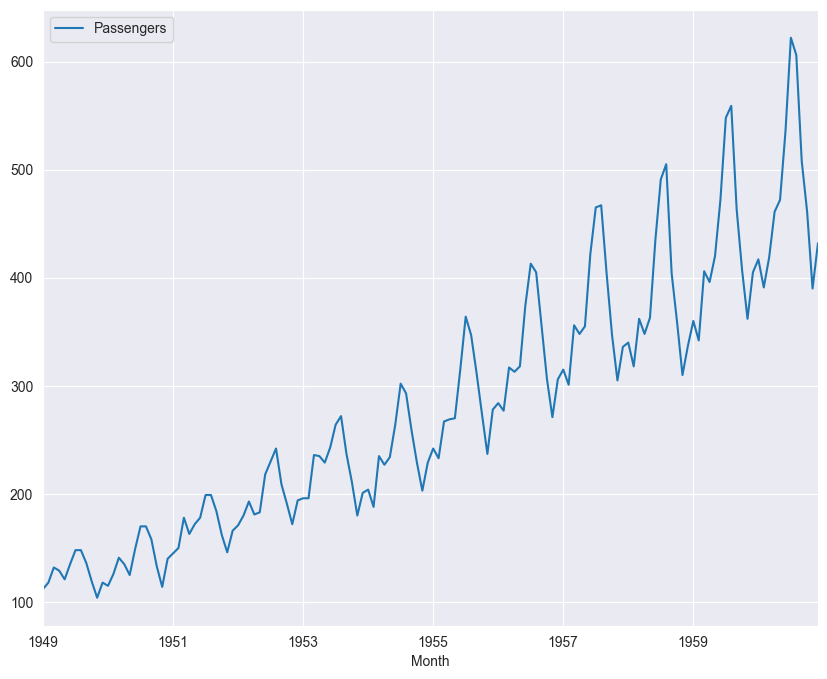

In [158]:
# Visualisation the AirPassengers datasets.
matplotlib.rcParams['figure.figsize'] = [10, 8]
df_airpass.plot()
plt.show()


In [159]:
# Making 'acf' correlation.
acf_corr = acf(df_airpass.Passengers)
acf_corr


array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [160]:
# Making 'pacf' correlation.
pacf_corr = pacf(df_airpass.Passengers)
pacf_corr


array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498, -0.7183246 , -0.08948064,
        0.22160591,  0.13462253,  0.11561572,  0.1948294 ,  0.09665618,
       -0.20215868, -0.0936381 ])

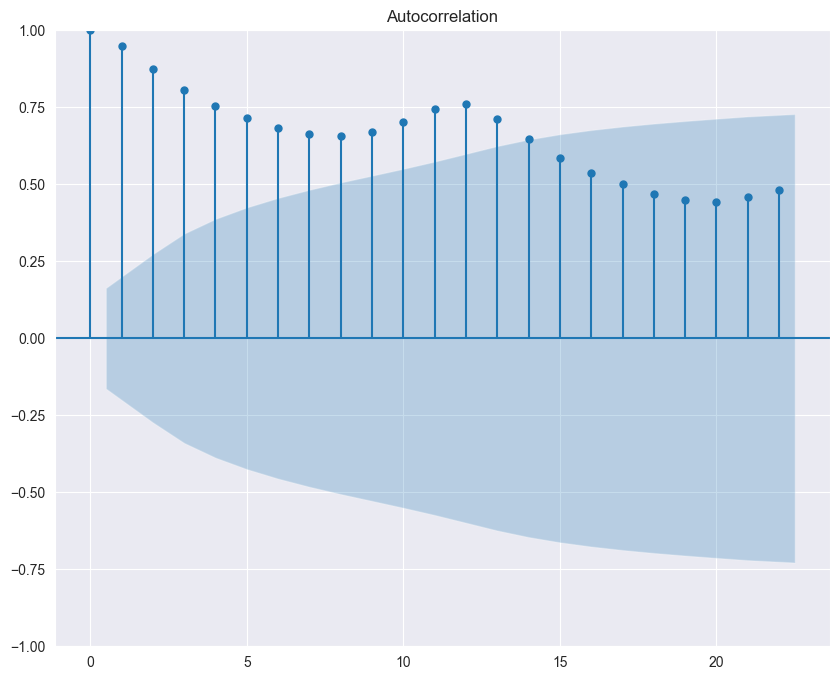

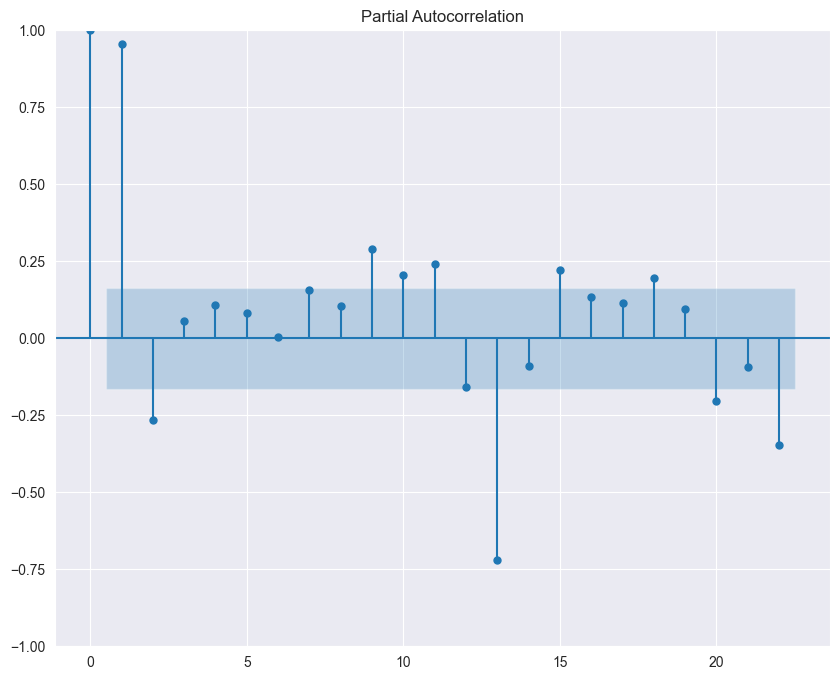

In [161]:
# Visualisation Acf Correlation.
matplotlib.rcParams['figure.figsize'] = [10, 8]
plot_acf(df_airpass.Passengers)

# Visualisation Pacf Correlation.
plot_pacf(df_airpass.Passengers)
plt.show()


In [162]:
# Splitting the dataset.
train = df_airpass[:100]
test = df_airpass[100:]
print('Train part:', (len(train)))
print('Test part:', len(test))


Train part: 100
Test part: 44


In [163]:
# Testing with Dickey-Fuller Test.
DF_test = adfuller(df_airpass, autolag='AIC')
print('Dickey-Fuller Test:')

print('1. ADF:', DF_test[0])
print('2. P-Value:', DF_test[1])
print('3. Num Of Lags:', DF_test[2])
print('4. Num Of Observations Used For ADF Regression and Critical Values Calculation:', DF_test[3])
print('5. Critical Values:')


for key, val in DF_test[4].items():
    print('\t', key, ':', val)


Dickey-Fuller Test:
1. ADF: 0.8153688792060518
2. P-Value: 0.991880243437641
3. Num Of Lags: 13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 130
5. Critical Values:
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


### ARIMA model:

In [164]:
# Making ARIMA model with the train data.
arima_model = ARIMA(df_airpass.Passengers[:110], order=(12,1,1))
arima_info = arima_model.fit()

# Output a table with results.
arima_info.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  110
Model:                ARIMA(12, 1, 1)   Log Likelihood                -406.585
Date:                Tue, 09 May 2023   AIC                            841.171
Time:                        21:08:45   BIC                            878.850
Sample:                    01-01-1949   HQIC                           856.451
                         - 02-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0981      0.098      1.001      0.317      -0.094       0.290
ar.L2         -0.0998      0.070     -1.420      0.156      -0.237       0.038
ar.L3          0.0464      0.060      0.776      0.438      -0.071       0.164
ar.L4         -0.1035      0.062     -1.659      0.097      -0.226       0.019
ar.L5          0.0725      0.065      1.121      0.262      -0.054       0.199
ar.L6         -0.0844      0.059     -1.436      0.151      -0.200       0.031
ar.L7          0.0087      0.072      0.121      0.903      -0.132       0.150
ar.L8         -0.1047      0.064     -1.644      0.100      -0.229       0.020
ar.L9          0.0496      0.072      0.684      0.494      -0.092       0.192
ar.L10        -0.1125      0.063     -1.783      0.075      -0.236       0.011
ar.L11         0.0832      0.068      1.218      0.223      -0.051       0.217
ar.L12         0.8139      0.066     12.248      0.000       0.684       0.944
ma.L1         -0.2682      0.155     -1.727      0.084      -0.573       0.036
sigma2        84.0093     13.630      6.164      0.000      57.296     110.723
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 3.69
Prob(Q):                              0.70   Prob(JB):                         0.16
Heteroskedasticity (H):               1.83   Skew:                             0.45
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [165]:
# Making prediction.
arima_predict = arima_info.predict()
arima_predict


1949-01-01      0.000000
1949-02-01    112.031419
1949-03-01    120.019967
1949-04-01    136.465900
1949-05-01    124.555799
                 ...    
1957-10-01    352.982033
1957-11-01    316.097235
1957-12-01    338.304691
1958-01-01    343.670174
1958-02-01    325.290362
Freq: MS, Name: predicted_mean, Length: 110, dtype: float64

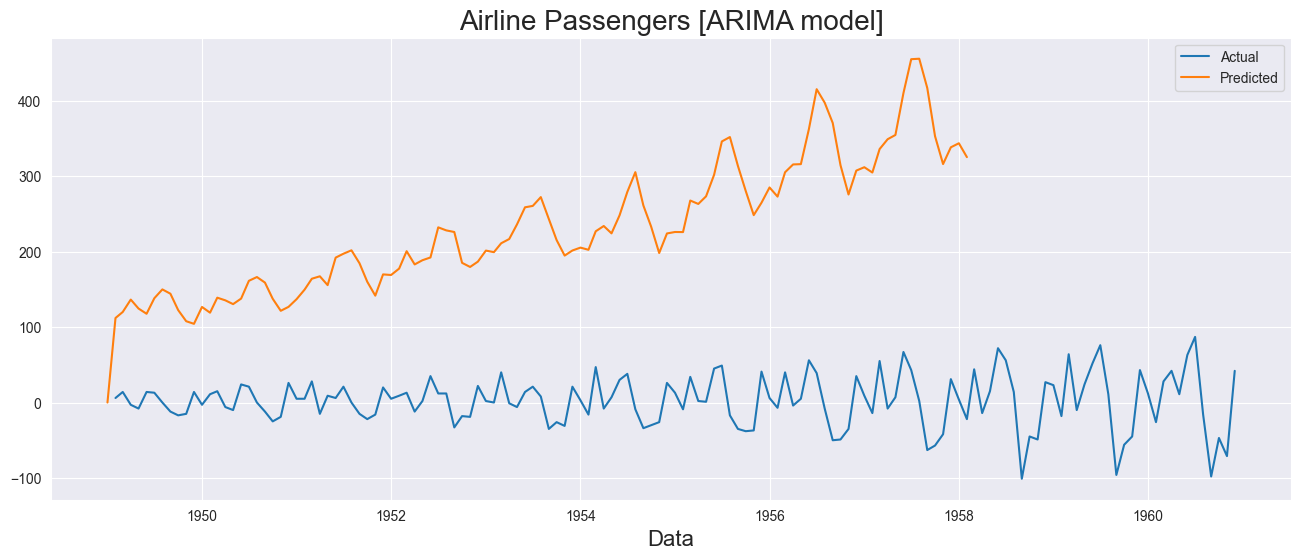

In [166]:
# ARIMA Prediction Visualisation.
plt.figure(figsize=(16,6))
plt.plot(df_airpass.diff(), label='Actual')
plt.plot(arima_predict, label='Predicted')
plt.title('Airline Passengers [ARIMA model]', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.legend()


### SARIMAX model:

In [167]:
# Making SARIMAX model with the train data.
sarimax_model = SARIMAX(df_airpass.Passengers[:110], seasonal_order=(2, 2, 2, 18))
sarimax_info = sarimax_model.fit()

# Output a table with results.
sarimax_info.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                              Passengers   No. Observations:                  110
Model:             SARIMAX(1, 0, 0)x(2, 2, [1, 2], 18)   Log Likelihood                -341.434
Date:                                 Tue, 09 May 2023   AIC                            694.868
Time:                                         21:09:09   BIC                            708.692
Sample:                                     01-01-1949   HQIC                           700.383
                                          - 02-01-1958                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8834      0.074     11.859      0.000       0.737       1.029
ar.S.L18      -0.5879     11.188     -0.053      0.958     -22.517      21.341
ar.S.L36       0.2753     10.131      0.027      0.978     -19.581      20.131
ma.S.L18      -1.5171     83.248     -0.018      0.985    -164.680     161.646
ma.S.L36       0.5350     36.122      0.015      0.988     -70.263      71.333
sigma2       169.5835   1.59e+04      0.011      0.991    -3.1e+04    3.14e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.88   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.05   Prob(JB):                         0.51
Heteroskedasticity (H):               2.92   Skew:                             0.33
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
# Making prediction.
sarimax_predict = sarimax_info.predict()
sarimax_predict


1949-01-01      0.000000
1949-02-01      0.771456
1949-03-01      1.455189
1949-04-01      2.112711
1949-05-01      2.624528
                 ...    
1957-10-01    365.095046
1957-11-01    317.686000
1957-12-01    336.560123
1958-01-01    353.632970
1958-02-01    327.888737
Freq: MS, Name: predicted_mean, Length: 110, dtype: float64

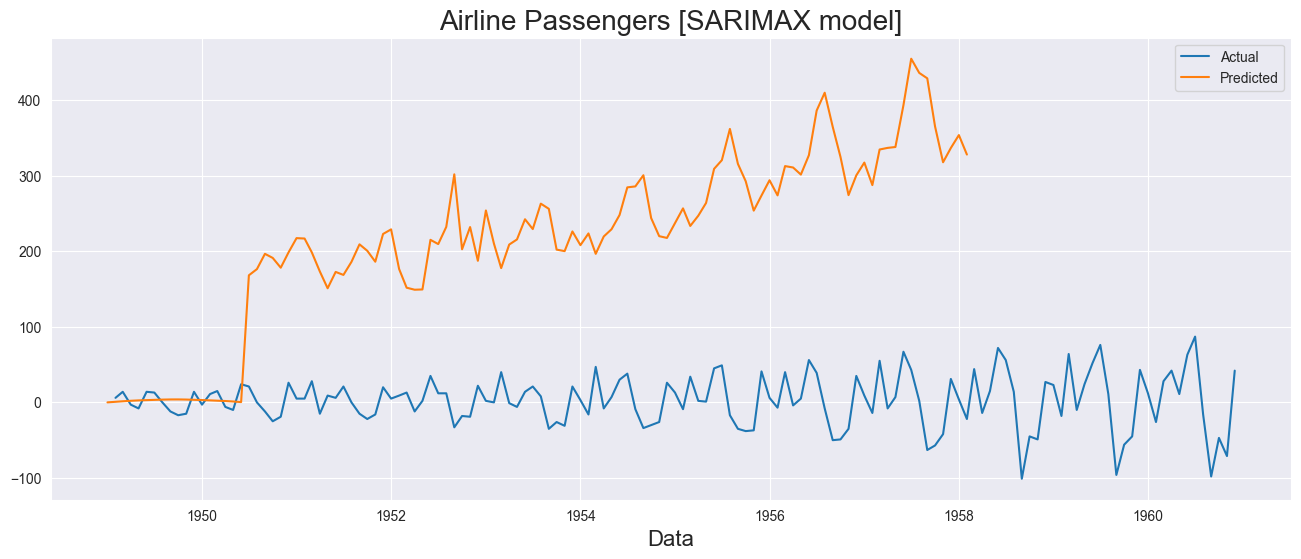

In [169]:
# SARIMAX Prediction Visualisation.
plt.figure(figsize=(16,6))
plt.plot(df_airpass.diff(), label='Actual')
plt.plot(sarimax_predict, label='Predicted')
plt.title('Airline Passengers [SARIMAX model]', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.legend()
